<a href="https://colab.research.google.com/github/ohMomin/Covid-Data-Science/blob/main/Momin_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tracking the COVID-19 Epidemic
## CSE-1010 Data Science Homework

### Introduction

[Coronavirus disease 2019 (or COVID-19)](https://www.cdc.gov/coronavirus/2019-ncov/downloads/2019-ncov-factsheet.pdf) is a highly contagious respiratory disease caused by a novel coronavirus. It is rapidly spreading across the globe and is being tracked by a variety of sources. In this assignment, your task is to use your programming and data science knowledge to explore COVID-19 data and answer several hypotheses. 

### Data

The data we will be using is the [Novel Corona Virus 2019 Dataset](https://github.com/beoutbreakprepared/nCoV2019/tree/master/latest_data).

### Hypotheses

* Incidence of COVID-19 differs by sex.

* Are mortality rates correlated with age?

* Are reported cases of COVID-19 more prevalent in colder climates?


First, we install packages into the Google Colaboratory virtual machine.

In [ ]:
# install packages
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     / 133.1 MB 1.9 MB/s
     |████████████████████████████████| 6.3 MB 22.0 MB/s 
     |████████████████████████████████| 219 kB 46.2 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759602 sha256=56fe5642ee3e96a37065ce802b9110a8bb5c84c7568643ecd41570d0b9e67f25
  Stored in directory: /tmp/pip-ephem-wheel-cache-squ0r86i/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=64f8ff77a7c6e36acc6839671cbfe72836e6b9cea656a1aee461e821e5660f2f
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built basemap pyshp


     |████████████████████████████████| 2.8 MB 33.4 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702476 sha256=97ba8ecef6646308510031d07bb2856a33ac57aa9331764a4a61b996d860c390
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.2.1
    Uninstalling pyproj-3.2.1:
      Successfully uninstalled pyproj-3.2.1


Next, we import the libraries that we will need for this analysis.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

# For improved table display in the notebook
from IPython.display import display

# for plotting on maps
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

# set printing options for pandas
pd.set_option('max_rows', 2000)

The first step in our data science model in the week 9 lectures, is to collect or identify data. I have provided for you a direct link to the COVID-19 data on Google drive. We can access it by treating the file as a StringIO object and passing that into the pandas ```read_csv()``` function.

In [ ]:
data_url = requests.get('https://drive.google.com/uc?export=download&id=1pRnqYs1nuBEbwUJAuQApmyWETSYEVWDy')
csv_raw = StringIO(data_url.text)
covid19_data = pd.read_csv(csv_raw,low_memory=False)

We first describe how to extract elements from a pandas data frame.

In [ ]:
# You can extract values from a data frame in many different ways. 
# To retrieve a column we can use   df[colname]
print(covid19_data['country'].head(n=3)) # here we use head simply to suppress the large amount of output

# We can also use this syntax
print(covid19_data.country.head(n=3)) 

# or pass a list to get multiple columns
print(covid19_data[['country','province']].head(n=3)) 

#.loc() can be used to set a range of rows and/or columns (by name)
print(covid19_data.loc[10:15,['country','province']])

#.iloc() can be used to set a range of rows and/or columns (by index)
print(covid19_data.iloc[10:15,0:4])

0    United States
1             Iran
2              NaN
Name: country, dtype: object
0    United States
1             Iran
2              NaN
Name: country, dtype: object
         country    province
0  United States  Washington
1           Iran   Khuzestan
2            NaN         NaN
          country    province
10  United States  Washington
11          China       Anhui
12  United States  Washington
13  United States    Colorado
14          China       Anhui
15    Switzerland      Zurich
          ID    age     sex                     city
10    000-1-  60-69  female         Snohomish County
11   000-1-1     30    male  Chaohu City, Hefei City
12   000-1-1  60-69  female           Whatcom County
13  000-1-10  60-69  female            Pitkin County
14  000-1-10     30    male               Hefei City


## Exploratory Data Analysis

After we've loaded in the data, the second step in our data science model is to clean and prepare the data. But, in order to do that, we should try to understand it first.

**Problem 1)** 

* Write a function named ```rows_and_columns``` that takes in a pandas data frame and returns the string:

  The data has X rows and Y columns.

  where X is the number of rows and Y is the number of columns. For example, if the data frame has 100 rows and 10 columns, the function should return the string:

  The data has 100 rows and 10 columns.

* Write a function named ```get_min_max``` that takes in a pandas data frame and a column name as a string, and returns the minimum and maximum value of that column in a tuple

* Write a function named ```odd_get_min_max``` that takes in a pandas data frame and a column name as a string, and returns the minimum and maximum values for the odd rows and that column in a tuple


In [ ]:
# Problem 1) write your first function here
import pandas as pd
import numpy as np
def rows_and_columns(pd):
  return "The data has {} rows and {} columns.".format(pd.shape[0],pd.shape[1])


# Problem 1) write your second function here
def get_min_max(df, col):
  minimum = df[col].min()
  maximum = df[col].max()
  order = (minimum,maximum)
  return order


# Problem 1) write your third function here

def odd_get_min_max(df,col):
  min_value = df.loc[range(1,df.shape[0],2)][col].min()
  max_value = df.loc[range(1,df.shape[0],2)][col].max()
  return min_value, max_value


And we can test our functions!

In [ ]:
# here we call your functions
print(rows_and_columns(covid19_data))

print(get_min_max(covid19_data,'latitude'))

print(odd_get_min_max(covid19_data,'latitude'))

The data has 261558 rows and 34 columns.
(-54.0, 70.0718)
(-54.0, 70.0718)


To get a sense of the data, let's view the column names and a sample of the data.

In [ ]:
print(covid19_data.columns)
print(covid19_data.head())

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials',
       'travel_history_binary'],
      dtype='object')
       ID    age  ... data_moderator_initials travel_history_binary
0  000-1-  30-39  ...                     NaN                   NaN
1  000-1-    NaN  ...                     NaN                   NaN
2  000-1-    NaN  ...                     NaN                   NaN
3  000-1-  50-59  ...                     NaN     

The data contain information on where the individual was diagnosed, how old they are, when they were diagnosed, and various other information. But simply looking at the column names and first few rows does not give us too much information. The dataframe ```info()``` function is a great way to get a summary of the input data.

In [ ]:
covid19_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261558 entries, 0 to 261557
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        261558 non-null  object 
 1   age                       13358 non-null   object 
 2   sex                       13399 non-null   object 
 3   city                      127179 non-null  object 
 4   province                  245423 non-null  object 
 5   country                   261483 non-null  object 
 6   wuhan(0)_not_wuhan(1)     64744 non-null   float64
 7   latitude                  260425 non-null  float64
 8   longitude                 260425 non-null  float64
 9   geo_resolution            260425 non-null  object 
 10  date_onset_symptoms       3423 non-null    object 
 11  date_admission_hospital   1849 non-null    object 
 12  date_confirmation         259888 non-null  object 
 13  symptoms                  1521 non-null    o

```info()``` shows us that most columns have significantly high levels of missing data. Typically, columns with high levels of missing data are removed or imputed. Here, we will ignore the missing data. The ```describe()``` function is more useful when you have numerical data, but it still provides useful information on how our data are distributed.

In [ ]:
covid19_data.describe(include="all")

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
count,261558,13358,13399,127179,245423,261483,64744.000000,260425.000000,260425.000000,260425,3423,1849,259888,1521,4228,2034,5297,1313,7349,850,182,243108,1311,857,462,421,7600,6387,94659,227577,245082,222352,37639,21692.000000
unique,259159,203,2,3169,667,115,NaN,NaN,NaN,6,102,81,102,396,3,176,861,58,2299,244,65,3255,211,29,74,117,373,411,1772,459,104,1976,10,NaN
top,000-1-,50-59,male,New York City,New York,United States,NaN,NaN,NaN,admin1,20.03.2020,30.01.2020,23.03.2020,fever,no,21.01.2020,Wuhan,na,Sincheon Daegu Church,1,https://coronavirus.dc.gov/page/coronavirus-data,https://coronavirus.health.ny.gov/county-count...,https://www.sejong.go.kr/bbs/R3340/list.do,discharge,18.02.2020,Could be some cases from 23rd,Chicago,Xiantao City,Wuhan City,New York,United States,33,TR,NaN
freq,11,533,7444,17373,53518,117979,NaN,NaN,NaN,119834,106,90,28557,303,3671,112,795,970,342,127,48,52476,58,161,20,91,985,235,13663,53516,117928,41145,35494,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.788969,37.602863,-15.005627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.085331
std,NaN,NaN,NaN,NaN,NaN,NaN,0.408044,14.707939,78.820706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.279380
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-54.000000,-159.602502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,33.352046,-75.646457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,40.661000,-9.139300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,43.014087,14.470000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In the absence of documentation, the values in the data allow us to interpret the data columns. 

#### Data Cleaning and Wrangling

The data are messy. Various parties have contibuted to the dataset without following a consistent formatting for the columns. If we are interested in questions about age, for example, we need to clean the age column. First, let's visualize the age column data by counting the unique fields.

**Problem 2)** Write a function named "get_uniq" that takes in a pandas data frame and a column name, and returns a numpy ndarray containing the unique values in that column.

*Hint: use the DataSeries.unique() function: https://pandas.pydata.org/pandas-docs/stable/reference/series.html*


In [ ]:
# Problem 2) write your function here
def get_uniq(covid19_data,column_name):
  return covid19_data[column_name].unique()


Let's use your function to print out the unique elements in the age column.

In [ ]:
print(get_uniq(covid19_data,'age'))

['30-39' nan '50-59' '60-69' '30' '44' '65' '8-68' '21-72' '26' '36' '45'
 '43' '70' '52' '66' '27' '17' '51' '68' '53' '35' '28' '58' '33' '31'
 '50' '24' '88' '29' '21' '78' '60' '63' '32' '37' '49' '71' '20-29'
 '18-99' '47' '41' '39' '42' '38' '7' '40-49' '82' '61' '64' '34-66' '62'
 '40-89' '80-89' '55' '0.25' '13-19' '69' '16' '8' '10' '25' '34' '55-74'
 '75-' '70-79' '79' '35-54' '55-' '95' '40' '54' '40-50' '46' '48' '57'
 '56' '60-60' '80-80' '73' '0-18' '77' '67' '18-' '0-6' '0-10' '22' '74'
 '10-19' '83' '96' '76' '20' '19' '1.75' '75' '9' '18-65' '1' '54-56'
 '0.6666666667' '74-76' '27-29' '80' '18' '72' '4' '59' '15' '61-80' '23'
 '65-99' '81' '90-99' '50-69' '50-60' '92' '85' '91' '87' '14' '12'
 '19-65' '70-70' '60-70' '2' '30-70' '20-70' '20-69' '16-17' '94' '5-59'
 '13' '60-' '27-40' '1-19' '18-50' '18-49' '41-60' '18-60' '60-99' '40-69'
 '30-69' '40-45' '5' '0-9' '3' '13-69' '30-40' '70-100' '0-60' '18 - 100'
 '0-20' '89' '30-35' '50-100' '60-100' '65-' '50-' '93' '84

We can also compute the counts for each of the unique elements. Pandas gives us a handy function to do this: ```value_counts()```. By default, ```value_counts()``` ignores NaN values.

In [ ]:
print(covid19_data['age'].value_counts())

50-59           533
60-69           442
40-49           420
30-39           335
70-79           256
30              228
56              215
33              214
50              211
20-29           211
49              209
42              207
32              199
47              196
54              195
37              195
35              194
43              192
52              190
55              189
28              184
44              183
38              176
57              176
53              175
39              174
29              174
31              172
40              171
41              170
51              169
45              167
60              166
48              165
27              162
34              162
64              161
36              158
46              158
26              157
68              155
67              153
58              151
65              149
25              145
24              142
63              139
62              139
61              138
69              138


**Problem 3)** Define a function named "unique_nonNaN_cnt" that takes a pandas data frame, a column name as a string, and returns the number of unique non-NaN values. You can think about this as either counting the non-NaN values *or* summing up the unique non-NaN values from the ```value_counts()``` method.

In [ ]:
# Problem 3) write your function here
def unique_nonNaN_cnt(covid19_data, column_name):
  return covid19_data[column_name].value_counts().sum()
  


and test our function...

In [ ]:
print("Total of " + str(unique_nonNaN_cnt(covid19_data,'age')) + " non-NaN age entries.")

Total of 13358 non-NaN age entries.


It's clear that the individuals entering the data were not following the same standard or format! We will need to clean this data before we can use it.

There is a large amount of missing data, and a large variety of entries. We should clean the age columns. Let's convert the ages to age ranges for plotting. For the existing ranges in the data, let's consider the mean age.

In [ ]:
# cleaning the age column
# We observe that the age column does not follow a nice format

# defining the age ranges
age_ranges = []
for age in range(0,100,10):
  age_ranges.append((age,age+10))
print("Considering age ranges",age_ranges)

# helper function that takes in an numerical age, and a list of ranges and 
# returns the particular range that the age falls into
def findRange(age,arange):
  for ager in arange:
    if age >= ager[0] and age < ager[1]:
      return str(ager[0])+"-"+str(ager[1])

# a function that will fix our age entries
def fixAge(age):
  if isinstance(age, str): # check if the age is a string
    if 'weeks' in age:
      age = age.replace('weeks','')
      age = str(float(age)/52.0)
    if '-' in age: # if the string has a hyphen (is a range)
      parts = age.split("-")
      if len(parts)==1 or len(parts[1])==0: # if the range was poorly formatted...
        return findRange(float(parts[0]),age_ranges)
      elif len(parts)==2: # if the range was properly formatted, findRange of the mean
        return findRange(np.mean([float(parts[0]),float(parts[1])]),age_ranges)
      else:
        print(age)
        raise InputError("Age " + str(age) + " not correctly handled.")
    else: 
        return findRange(float(age),age_ranges)
  elif np.isnan(age):
    return np.nan
  else:
    raise InputError("Age " + str(age) + " not correctly handled.")

# create a new column that holds the new age ranges
# this code will run the fixAge function for each row of the covid data frame and
# store the result in the newly created 'age_range' column
covid19_data['age_range'] = covid19_data.apply(lambda row : fixAge(row['age']), axis = 1) 

Considering age ranges [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]


The ```apply()``` function is very important: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html.  It allows us to apply a function across some data frame axis (e.g. for each row, or each column). It's combined with the ```lambda``` keyword here. ```lambda``` defines an anonymous function (a function without a name). You can use these wherever functions are required, but allow you to define the functionality in a single expression. Let's do some quality control to verify we didn't make any mistakes.



In [ ]:
print("the total number of rows with non-NaN ages is " + str(sum(covid19_data['age'].value_counts())))
print("the total number of rows with non-NaN age_ranges is " + str(sum(covid19_data['age_range'].value_counts())))

the total number of rows with non-NaN ages is 13358
the total number of rows with non-NaN age_ranges is 13357


The number of non-NaN age_ranges is 1 less, and if we inspect the original data, we can find that one age did not fall in our age ranges of 0-100. This age was 121 and is likely a mistake in entry since the oldest person currently alive is 117 years old, so we can safely discard this outlier.

The next step in our data science model is exploratory data analysis. Let's visualize the COVID-19 cases by age group. There are a number of plots we can use here; a bar plot is a good choice. 

No handles with labels found to put in legend.


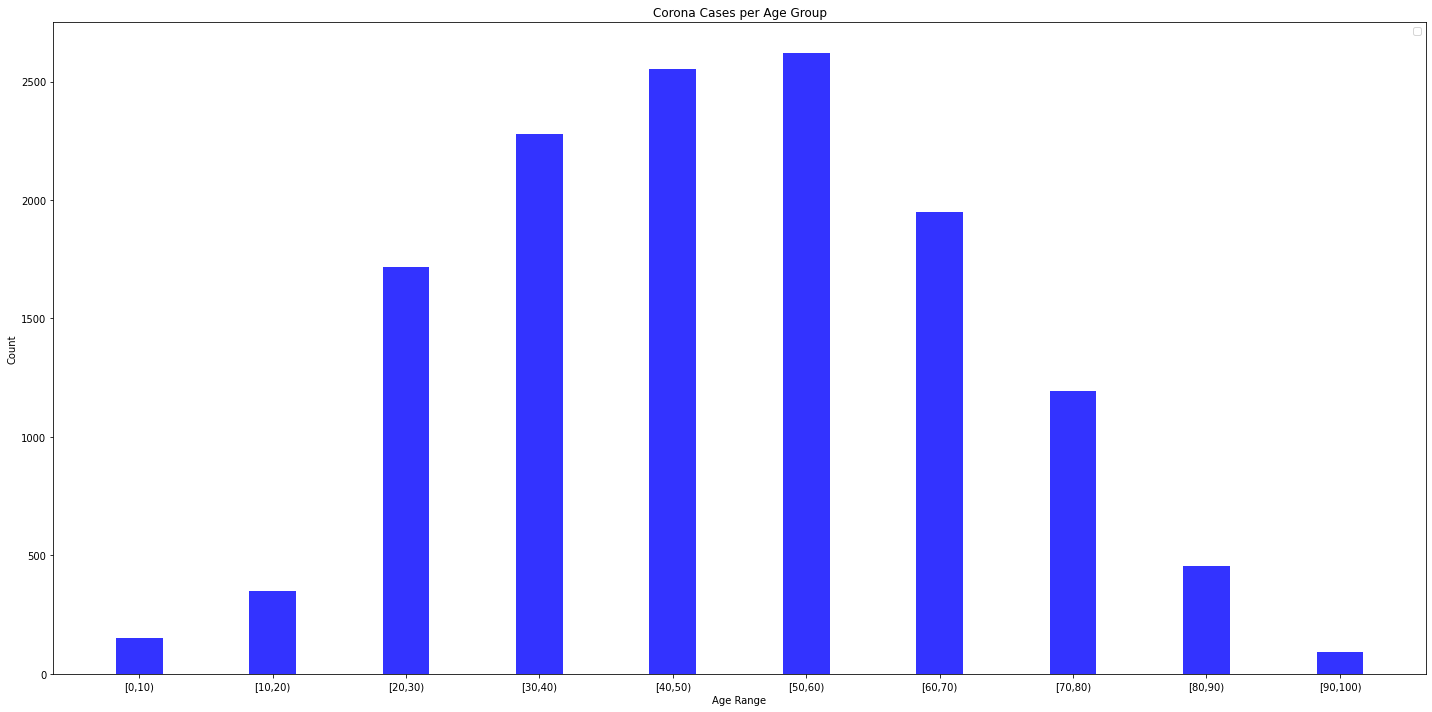

In [ ]:
# distribution of cases by age
age_range_labels = [str(x[0])+"-"+str(x[1]) for x in age_ranges]
counts = covid19_data.age_range.value_counts()[age_range_labels]

# create plot
fig, ax = plt.subplots(figsize=(20, 10))
index = np.arange(len(age_ranges))
bar_width = 0.35
opacity = 0.8

# docs are here: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.bar.html
rects1 = plt.bar(index, counts, bar_width,alpha=opacity,color='b')

plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Corona Cases per Age Group')
plt.xticks(index, ["["+str(x[0])+","+str(x[1])+")" for x in age_ranges])
plt.legend()

plt.tight_layout()

Let's address the **incidence of COVID-19 differs by sex** hypothesis we made above. We can make a bar plot stratified by sex.

**Problem 4)** Fill in the relevant prompts below to create the bar plot of COVID-19 cases by sex.

As a hint, we can select a subset of rows based on the value in a column with the syntax:

```dataframe[dataframe[colname]==value]```

where dataframe is a pandas data frame, colname is the column name, and value is some value for the colname. You can use other logical comparisons as well, e.g., to get all rows with latitude > 0, we can use the syntax:

```covid19_data[covid19_data.latitude>0]```




In [ ]:
# distribution of cases by age and sex
# Problem 4) Complete where we have indicated below
def create_bar_plot_by_sex(covid19_data, age_ranges):
  age_range_labels = [str(x[0])+"-"+str(x[1]) for x in age_ranges]

  female_age_ranges =  covid19_data[covid19_data.sex == 'female'].age_range
  counts_female = female_age_ranges.value_counts()[age_range_labels]
  
  male_age_ranges = covid19_data[covid19_data.sex == 'male'].age_range
  counts_male = male_age_ranges.value_counts()[age_range_labels]

  fig, ax = plt.subplots(figsize=(20, 10))
  index = np.arange(len(age_ranges))
  bar_width = 0.35
  opacity = 0.8

  rects1 = plt.bar(index, counts_male, bar_width, alpha=opacity,color='b',label='Male')

  rects2 = plt.bar(index+bar_width,counts_female , bar_width, alpha=opacity,color='g',label='Female')

  plt.xlabel('Age Range')
  plt.ylabel('Count')
  plt.title('Corona Cases per Age Group')
  
  plt.xticks(index, ["["+str(x[0])+","+str(x[1])+")" for x in age_ranges])
  plt.legend()

  plt.tight_layout()
  return counts_female, counts_male


Now let's run our visualization.

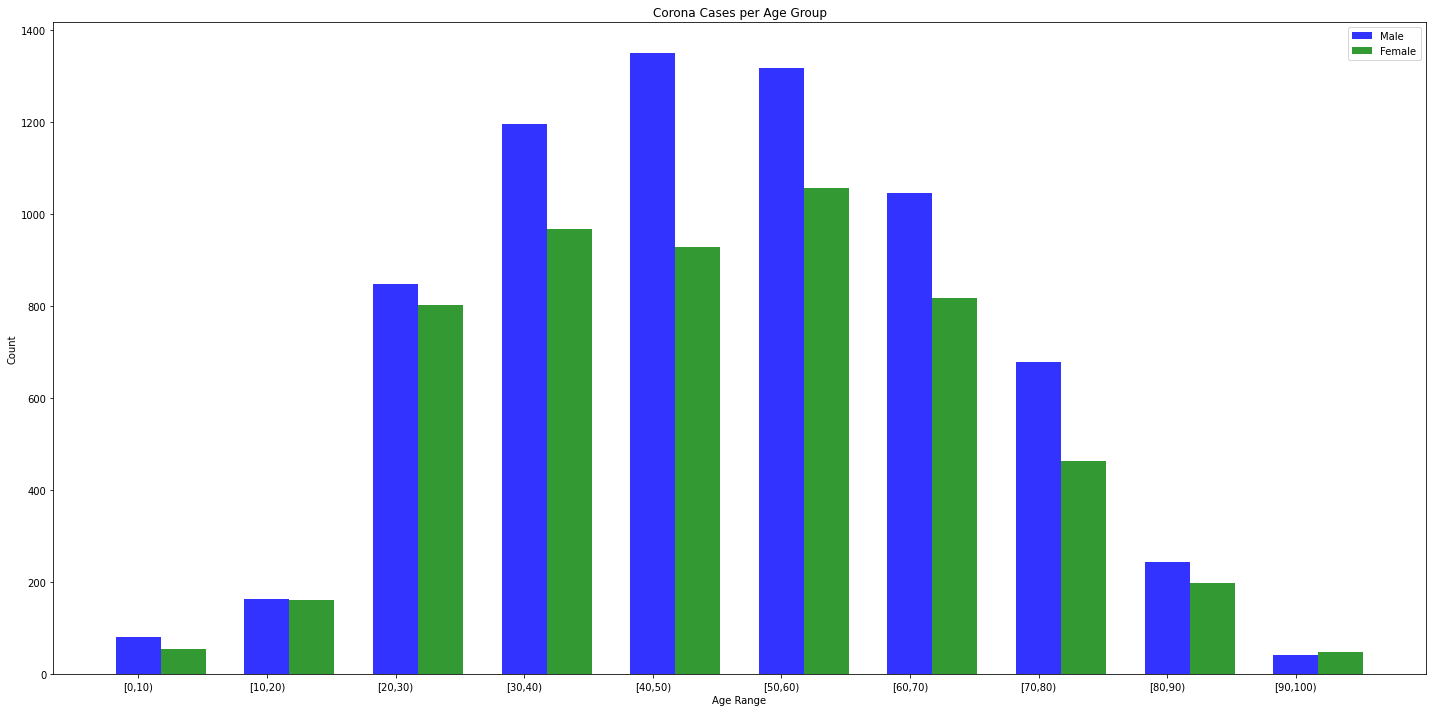

In [ ]:
cnts_f, cnts_m = create_bar_plot_by_sex(covid19_data, age_ranges)

Let's view the COVID-19 cases by country. The relevant column name is "country".

No handles with labels found to put in legend.


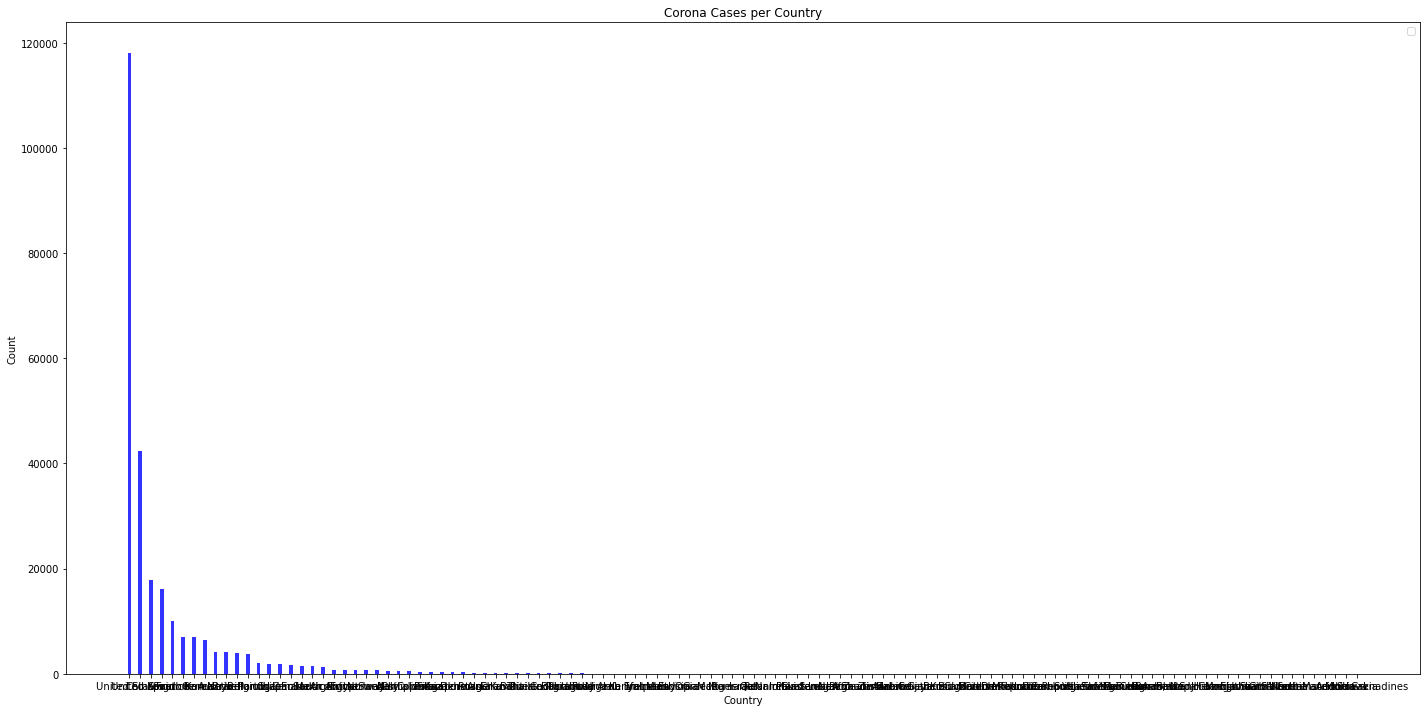

In [ ]:
# distribution of cases by country
def create_bar_plot_by_country(covid19_data):
  country_cnts = covid19_data.country.value_counts()

  n_groups = len(country_cnts)
  counts = country_cnts

  # create plot
  fig, ax = plt.subplots(figsize=(20, 10))
  index = np.arange(n_groups)
  bar_width = 0.35
  opacity = 0.8

  rects1 = plt.bar(index, counts, bar_width,
                  alpha=opacity,color='b')

  plt.xlabel('Country')
  plt.ylabel('Count')
  plt.title('Corona Cases per Country')
  #plt.xticks(index + bar_width, age_ranges)
  plt.xticks(index, country_cnts.index.values)
  plt.legend()

  plt.tight_layout()
  return n_groups, counts
ngrps, cnts = create_bar_plot_by_country(covid19_data)

This is difficult to interpret due to the squashed x-axis.

**Problem 5)** Print the same bar plot by country, but limit the plot to countries that have >1000 cases.

In [ ]:
# distribution of cases by country with >1000 cases
# Problem 5) Complete where we have indicated below
def create_bar_plot_by_country(covid19_data):
  country_cnts = covid19_data.country.value_counts()

  n_groups = len(country_cnts[country_cnts>1000])
  counts = country_cnts[country_cnts>1000]

  # create plot
  fig, ax = plt.subplots(figsize=(20, 10))
  index = np.arange(n_groups)
  bar_width = 0.35
  opacity = 0.8

  rects1 = plt.bar(index, counts, bar_width,
                  alpha=opacity,color='b')

  plt.xlabel('Country')
  plt.ylabel('Count')
  plt.title('Corona Cases per Country')
  plt.xticks(index, country_cnts.index.values)
  plt.legend()

  plt.tight_layout()
  return n_groups, counts


Now let's run our visualization.

No handles with labels found to put in legend.


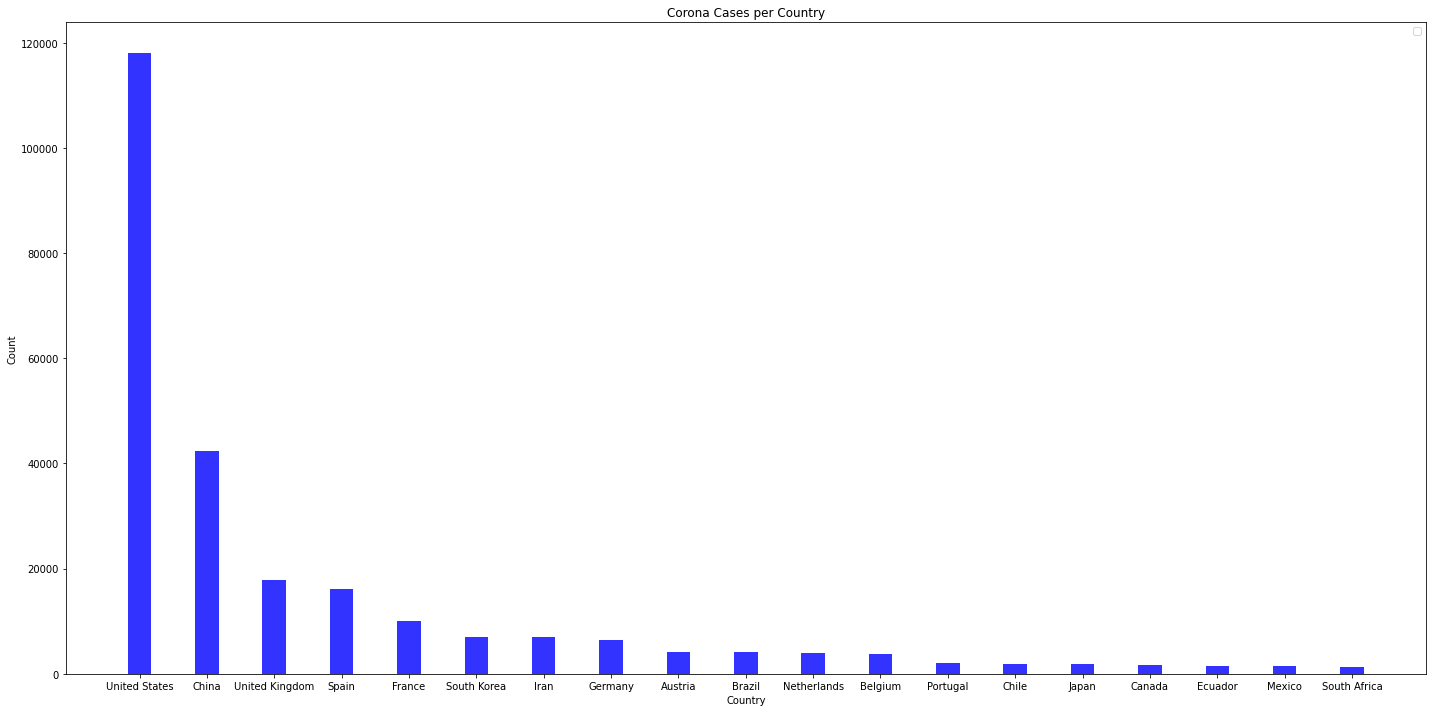

In [ ]:
ngrps, cnts = create_bar_plot_by_country(covid19_data)

Perhaps a more interesting visualization is to view the COVID-19 cases on the world map. To do this, we will make use of another very useful data frame function is ```groupby()```. The ```groupby()``` method groups our data rows by a specific columns or column values. Here we group our data by their rounded latitude, longitude, and country. We then count the IDs which gives us the number of cases in a latitude-longitude region.

In [ ]:
map_intensities = covid19_data.groupby([covid19_data.latitude.round(1), 
                                        covid19_data.longitude.round(1), 
                                        covid19_data.country]).ID.count().reset_index()

Now let's plot the cases across the globe using matplotlib Basemaps. Try to play around with the various parameters to get an idea of what they all do!

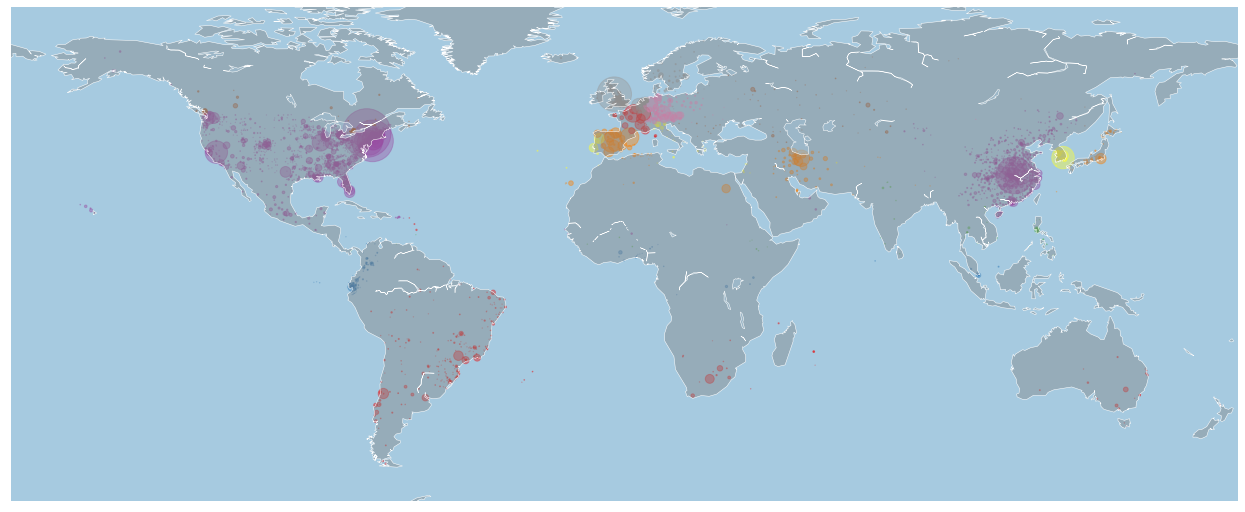

In [ ]:
# set the colors for countries
map_intensities['labels_enc'] = pd.factorize(map_intensities['country'])[0] 

plt.figure(figsize=(22, 22))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.4)
m.drawcoastlines(linewidth=0.5, color="white")

m.scatter(map_intensities['longitude'], map_intensities['latitude'], s=map_intensities['ID']/10, alpha=0.4, c=map_intensities['labels_enc'], cmap="Set1")


We see hotspots in the northeast USA (centered around NYC), the Iberian Peninsula, the U.K., China, Iran, and South Korea. Given recent news articles, we also notice that there is some underreporting in our data. We do not have the statistical language to formulate our questions as formal statisical hypotheses, but we can produce plots that support a particular interpretation of each hypothesis. We consider our first hypothesis:

**Are mortality rates correlated with age?**

First we need to clean and subset our data. We count the outcomes.

In [ ]:
print(covid19_data['outcome'].value_counts())

discharge                                                                   161
stable                                                                      156
Under treatment                                                             133
died                                                                        117
discharged                                                                   95
recovered                                                                    59
death                                                                        47
stable condition                                                             21
Alive                                                                        14
Dead                                                                         13
Stable                                                                        6
released from quarantine                                                      4
Recovered                               

From these results, we can see that there really is not enough data to draw definitive statistically robust conclusions. We can still do our analysis in anticipation that the data will be updated as the disease progresses. Let's group our outcomes into positive and negative classes.

In [ ]:
pos=['discharge','stable','discharged','recovered','stable condition','Alive','Stable','released from quarantine','Recovered','Discharged from hospital','Discharged']
neg=['died','death','Dead','severe','critical condition, intubated as of 14.02.2020','dead','Death','Deceased','severe illness','unstable','Died','Critical condition']

def setOutcomeClass(outcome):
  if outcome in pos:
    return 1
  elif outcome in neg:
    return 0
  else:
    return np.nan

covid19_data['outcome_class'] = covid19_data.apply(lambda row : setOutcomeClass(row['outcome']), axis = 1) 

Now let's create a different type of plot, a line graph. Here we want to visualize patterns of case severity across age groups, but each age group can have a different number of samples. Therefore, we compute an empirical probability of a positive outcome but also include $\pm$ 1 standard deviation. We also include Spearman's correlation on the plot.

Text(0.2, 0.2, 'spearman correlation = -0.3243078536594327')

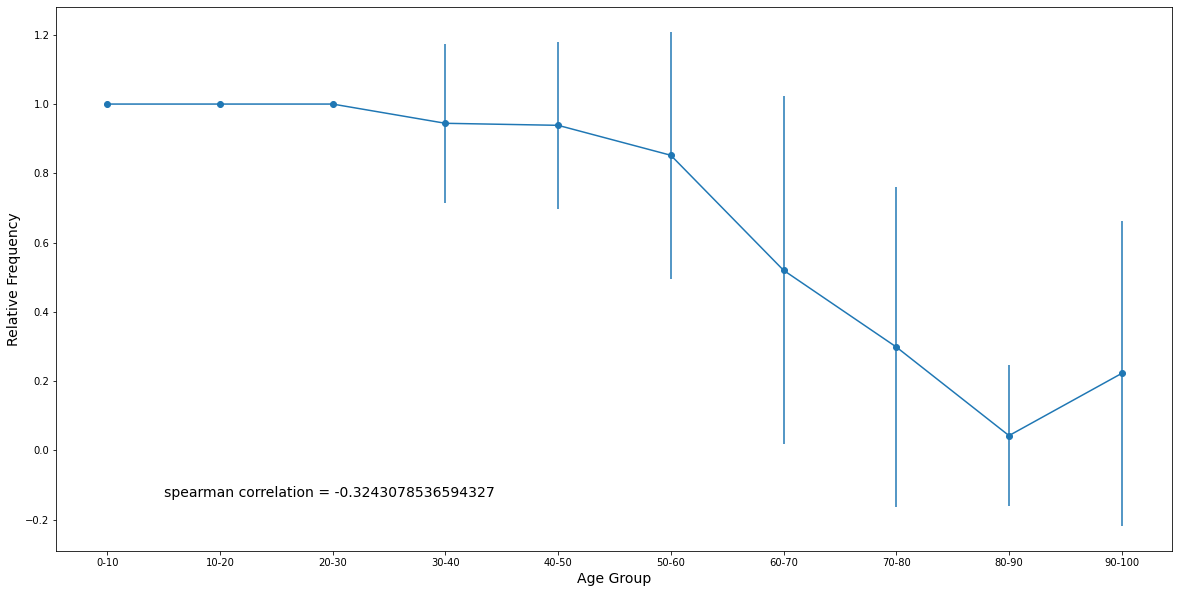

In [ ]:
# subset the data by age range and outcome class, then group by age range,
# and use the agg (aggregate) function to compute the mean, count, and 
# standard deviation by age group
outcomes_per_age = covid19_data[['age_range','outcome_class']].groupby(['age_range']).agg(['mean','count','std']).reset_index()
x = outcomes_per_age.age_range
y = outcomes_per_age.outcome_class['mean']
error = outcomes_per_age.outcome_class['std']

fig, ax = plt.subplots(figsize=(20, 10))
ax.errorbar(x, y, yerr=error, fmt='-o')
plt.ylabel('Relative Frequency', fontsize=14)
plt.xlabel('Age Group', fontsize=14)

fig.text(0.2,0.2,"spearman correlation = " + str(covid19_data['age_range'].corr(covid19_data['outcome'],method='spearman')), fontsize=14)


The visualization shows that the older the individual, the more likely the negative outcome. Spearman's negative correlation confirms this. 

**Problem 6)** Professor Derek is worried about outcomes over time for his age bracket (30-40). He wants you to plot the relative frequency of positive outcomes (y-axis) over time (x-axis) while also including 1 standard deviation above and below each point. You should not compute Spearman's correlation here. Fill in the function below.


In [ ]:
# Problem 6) Complete where we have indicated below
def create_bar_plot_for_derek(covid19_data):
  # first we subset the data by the appropriate age bracket and do a bit of cleaning
  prof_age_data = covid19_data[covid19_data.age_range=="30-40"]
  prof_age_data=prof_age_data.replace(to_replace='25.02.2020 - 26.02.2020',value='25.02.2020')

  # and we convert the column to a date-time
  prof_age_data['date_confirmation']=pd.to_datetime(prof_age_data['date_confirmation'],dayfirst=True)

  outcomes_per_age =  prof_age_data[['outcome_class', 'date_confirmation']].groupby(['date_confirmation']).agg(['mean','count','std']).reset_index()

  outcomes_per_age = outcomes_per_age.dropna() # we should drop the rows with missing values

  x = outcomes_per_age.date_confirmation
  y = outcomes_per_age.outcome_class['mean']
  error = outcomes_per_age.outcome_class['std']

  fig, ax = plt.subplots(figsize=(20, 10))
  ax.errorbar(x, y, yerr=error, fmt='-o')
  plt.ylabel('Relative Frequency', fontsize=14)
  plt.xlabel('Date', fontsize=14)
  return x, y, error
  



Now let's run our visualization.

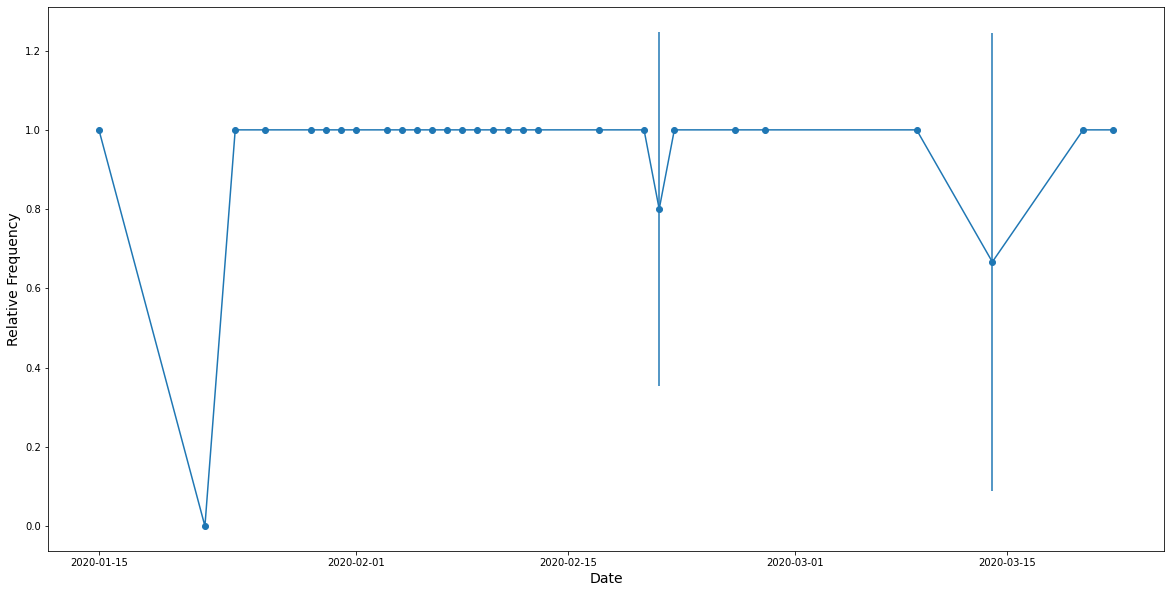

In [ ]:
x,y,error = create_bar_plot_for_derek(covid19_data)

Let's move on to our last hypothesis.

**Are reported cases of COVID-19 more prevalant in colder climates?**

Here we use the absolute value of the latitude as a proxy for temperature.

In [ ]:
# latitude data ranges from -90 (south pole) to 90 (north pole)
print(covid19_data['latitude'].describe())

count    260425.000000
mean         37.602863
std          14.707939
min         -54.000000
25%          33.352046
50%          40.661000
75%          43.014087
max          70.071800
Name: latitude, dtype: float64


Text(0.5, 0, 'Absolute Latitude Degree')

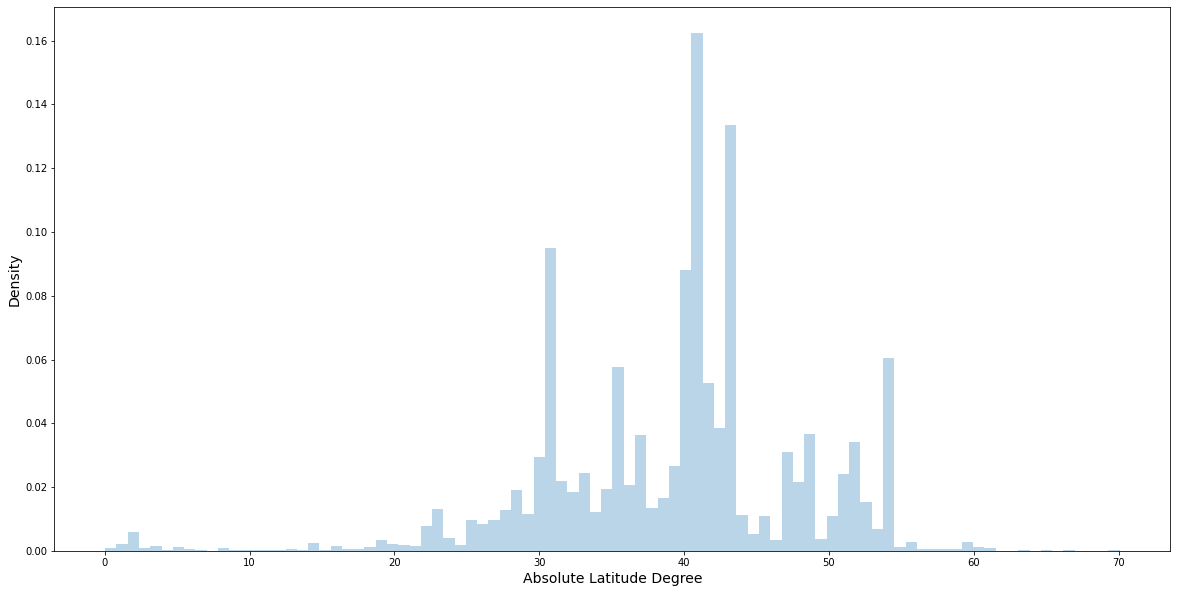

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

num_bins = 90

# the histogram of the data
ax.hist(abs(covid19_data['latitude']), num_bins, density=1,alpha=0.3)
plt.ylabel('Density', fontsize=14)
plt.xlabel('Absolute Latitude Degree', fontsize=14)


This is an interesting plot, but what if most people in the world live between latitudes 20 and 60? We would expect there to be more infections here. Let's also plot the density of individuals across the global at each latitude.

Text(0.5, 0, 'Absolute Latitude Degree')

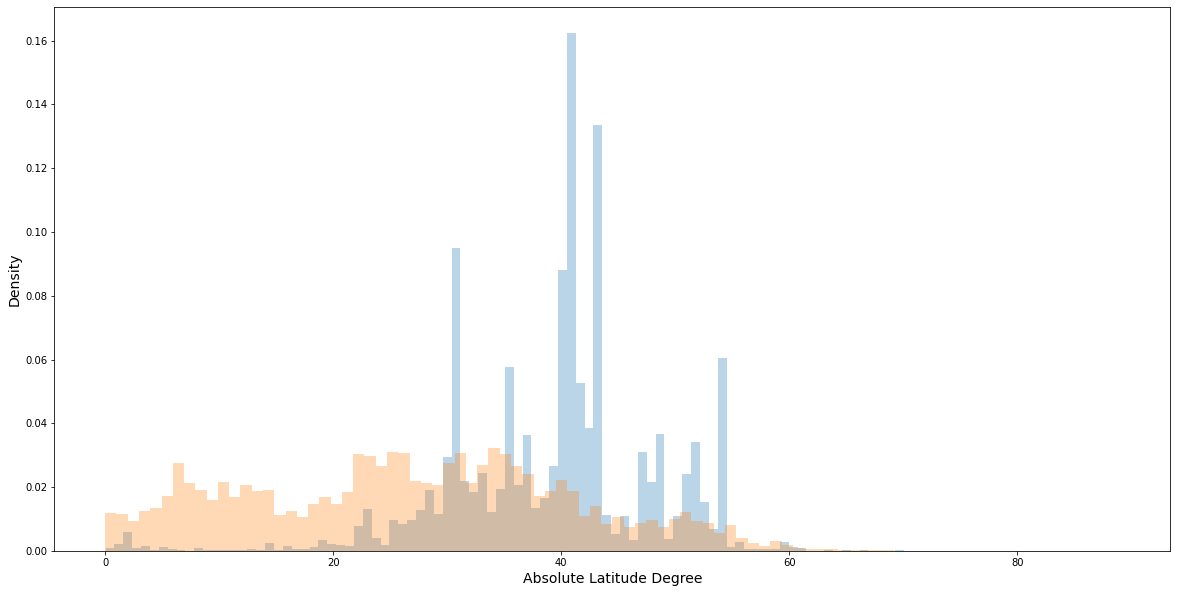

In [ ]:
# I downloaded and prepared the data for you.
population_data_url = requests.get('https://drive.google.com/uc?export=download&id=19BjvYrh_MkzE2NMJBOSJzJUaXaw3S85X')
population_csv = StringIO(population_data_url.text)
population_data = pd.read_csv(population_csv, delimiter=" ", header=None)
abs_latitude=np.linspace(0,90,360)

# population data goes from 90 degrees to -90 degrees in increments of 0.25 degrees
lat_sums=np.sum(population_data,axis=1)
lat_by_degree = lat_sums.groupby(np.arange(len(lat_sums))//4).sum()
population_sums = lat_by_degree.groupby(np.concatenate((np.arange(0,len(lat_by_degree)/2),np.arange(0,len(lat_by_degree)/2)[::-1]))).sum()

fig, ax = plt.subplots(figsize=(20, 10))

num_bins = 90

# the histogram of the data
ax.hist(abs(covid19_data['latitude']), num_bins, density=1,alpha=0.3)
ax.hist(range(num_bins)[::-1],bins=num_bins, density=1, weights=population_sums,alpha=0.3)
plt.ylabel('Density', fontsize=14)
plt.xlabel('Absolute Latitude Degree', fontsize=14)

We see that there are a considerable number of people who live close to the equator (latitude=0) so infections indeed are more prevalant in colder regions. Note that there are other factors in play here, such as, where the disease began and travel patterns.